# Recipe 1: Recreating my "Spotify Wrapped" by grouping and sorting the data; visualizing the results using matplotlib and seaborn

Jackson Wurzer


In this recipe I will be analyzing my data from Spotify and recreating my "Spotify Wrapped" by locating the 5 artists I have listened to the most. Then I will make a visualization for the results.  

Step 1: Importing necessary packages

In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Loading in the data and converting into a pandas data frame

In [18]:
with open('streamingHistory.json', 'r') as streamingData:
  data = json.load(streamingData) # loading data with json

df = pd.DataFrame(data) # converting to pandas data frame

We'll view the first few rows of this data frame to make sure it worked:

In [19]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2024-03-11 13:00,Lil Tecca,Molly Girl,112149
1,2024-03-11 14:34,21 Savage,No Opp Left Behind,590
2,2024-03-11 14:34,Baby Keem,family ties (with Kendrick Lamar),570
3,2024-03-11 14:34,Pop Smoke,Invincible,1990
4,2024-03-11 14:34,Lil Tecca,Molly Girl,1130


Step 3: Group by artist and sum the time  played and sort the values in descending order.

In [20]:
artistTotal = df.groupby('artistName')['msPlayed'].sum().sort_values(ascending=False) # grouping by artist and sorting by ms
artistTotal.head()

,msPlayed
artistName,
Drake,21831932
21 Savage,11891876
Future,11609517
Travis Scott,11068707
Lil Uzi Vert,9930838


We can see that the time played is in milliseconds, so let's convert to minutes.

In [32]:
artistMinutes = artistTotal / 60000 # converting to minutes by dividing by 60,000
artistMinutes = artistMinutes.astype(int) # converting to an integer
artistMinutes.head()

,msPlayed
artistName,
Drake,363
21 Savage,198
Future,193
Travis Scott,184
Lil Uzi Vert,165


This looks better now.

Step 4: We'll pick the top 5 artists and their corresponding minutes played

In [33]:
topArtists = artistTotal.head(5)
artistMinutes = artistMinutes.head(5)

Step 5: Lastly we'll plot our results using a bar chart to visualize the results nicely.

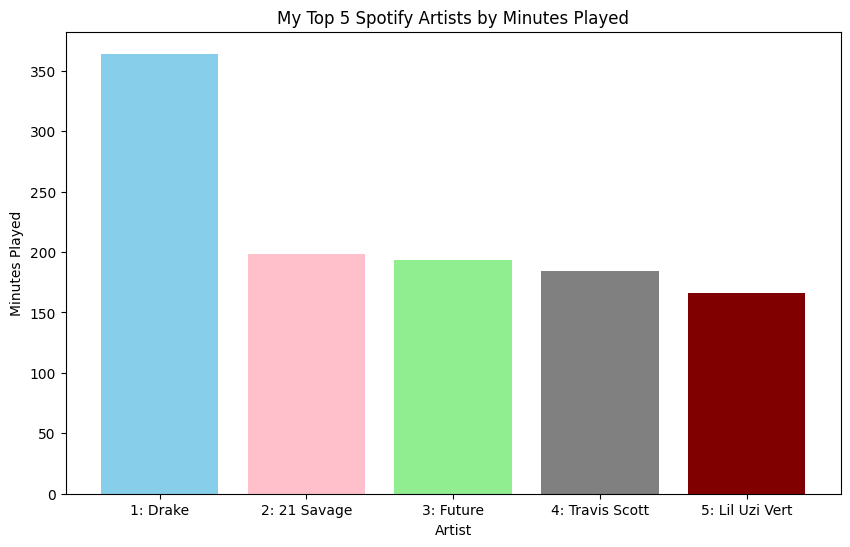

In [59]:
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'pink', 'lightgreen', 'grey', 'maroon']
ranked_labels = [f"{i+1}: {name}" for i, name in enumerate(topArtists.index)] # creating ranks from 1-5 for each artist in topArtists
plt.bar(ranked_labels, topArtists.values, color=colors)
plt.xlabel('Artist')
plt.ylabel('Minutes Played')
plt.title('My Top 5 Spotify Artists by Minutes Played')
plt.show()

Let's now try a different way of making a bar chart to display the results. Let's use seaborn now:

<ipython-input-67-4df902c58821>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, y='Artist', x='minutesPlayed', palette='pastel')


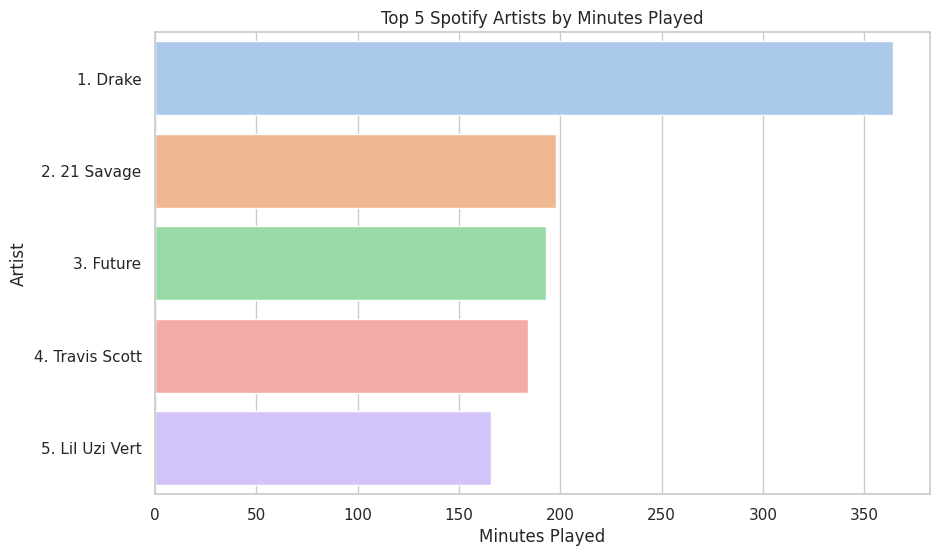

In [67]:
plot_df = pd.DataFrame({'Artist': [f"{i+1}. {name}" for i, name in enumerate(topArtists.index)],
    'minutesPlayed': topArtists.values}) # creating data frame for seaborn again creating ranking labels for each artist 1-5

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, y='Artist', x='minutesPlayed', palette='pastel')
plt.xlabel('Minutes Played')
plt.ylabel('Artist')
plt.title('Top 5 Spotify Artists by Minutes Played')
plt.show()